# Image Dataset Preprocessing and Visualization

This notebook contains functions for preprocessing and visualizing an image dataset with bounding box annotations. It's designed to convert annotations from a CSV file into YOLO format and prepare the dataset for object detection tasks.

## Key Functions

### `extract_boxes(row_data)`
- Extracts bounding box coordinates from a row of data.
- Returns an array of arrays, each containing [x, y, width, height] for a bounding box.

### `display_image_with_boxes(row_number, df, image_folder)`
- Displays an image with its corresponding bounding boxes.
- Uses matplotlib to plot the image and draw rectangles for each bounding box.

### `clean_data(df, image_folder, output_folder="dataset")`
- Main function for preprocessing the dataset.
- Filters out images without annotations.
- Converts bounding box format from matplotlib to YOLO.
- Creates a new dataset folder with 'images' and 'labels' subfolders.
- Copies relevant images and creates corresponding label files in YOLO format.

## Data Processing Steps

1. Load the CSV file containing image paths and bounding box coordinates.
2. Iterate through each row of the dataframe:
   - Skip rows with no annotations.
   - Extract bounding box coordinates.
   - Copy the image to the new dataset folder.
   - Convert bounding box coordinates from matplotlib format to YOLO format.
   - Create a label file for each image with YOLO format annotations.

## Usage

1. Set the paths for the CSV file and image folder:
   ```python
   csv_path = "labels.csv"
   image_folder = "LabelImage_KS_TX_Yolo"

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import os
import shutil

In [1]:
import os
import shutil
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd

# takes data from a whole row, outputs array of arrays
def extract_boxes(row_data):
    numBoxes = int(len(row_data)/4)
    bounding_boxes = [[0 for _ in range(4)] for _ in range(numBoxes)]
    
    index = 1
    for i in range (4):
        for j in range (0, numBoxes):
            bounding_boxes[j][i] = row_data.iloc[index]
            index += 1
    return bounding_boxes


def display_image_with_boxes(row_number, df, image_folder):
    # extract entire row 
    row_data = df.iloc[row_number]
    
    filled_columns = row_data.dropna().index
    
    # extract image file name and create path
    path = row_data.iloc[0]
    image_path = image_folder + '/' + os.path.basename(path)

    # plot the image
    img = Image.open(image_path)
    fig = plt.figure()  
    ax = fig.add_subplot(111)  # Add a single subplot to the figure
    ax.imshow(img)

    # extract the bounding boxes from data
    # array of arrays [[x,y,w,h] ... [x,y,w,h]]
    bounding_boxes = extract_boxes(row_data[filled_columns])

    # add bounding box to plot
    for bbox in bounding_boxes:
        xmin, ymin, w, h = bbox
        rect = patches.Rectangle((xmin, ymin), w, h, linewidth=1, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
    plt.show()


def clean_data(df, image_folder, output_folder = "sortedDataset"):
    ''' 
    creates a dataset folder that filters out images without annotations
    creates new csv file 
        - column 1 -> image name
        - columns [2:] -> groups of 4 columns, boxes in yolo format 
    '''

    # delete existing folder if it exists
    if os.path.exists(output_folder):
        shutil.rmtree(output_folder)
    
    # create new dataset folder
    os.makedirs(output_folder, exist_ok=True)

    # Create "images" and "labels" subfolders
    images_folder = os.path.join(output_folder, "images")
    labels_folder = os.path.join(output_folder, "labels")
    os.makedirs(images_folder, exist_ok=True)
    os.makedirs(labels_folder, exist_ok=True)

    for i in range(len(df)):
        row_data = df.iloc[i]

        # check if all columns except the first(image path) are NAN
        if row_data.iloc[1:].isna().all():  # Check from column 1 onwards
            continue  

        # matplotlib format [topleftX, topleftY, width, height] *origin at top left
        filled_columns = row_data.dropna().index
        matplot_bounding_boxes = extract_boxes(row_data[filled_columns])

        # filter out images with more than 4 bounding boxes
        if len(matplot_bounding_boxes) > 4:
            continue

        # process img path data
        path = row_data.iloc[0]
        img_name = os.path.basename(path)
        image_path = image_folder + '/' + img_name
        img_output_path = images_folder + '/' + img_name

        #copy image to dataset folder
        shutil.copy2(image_path, img_output_path)

        # extract image width, height
        img = Image.open(image_path)
        image_width, image_height = img.size

        #convert from matplotlib -> yolo
        yolo_box = []
        for bbox in matplot_bounding_boxes:
            x=bbox[0]
            y=bbox[1]
            w=bbox[2]
            h=bbox[3]

            x_center = x + w/2
            y_center = y + h/2

            x_norm = x_center/image_width
            y_norm = y_center/image_height
            w_norm = w/image_width
            h_norm = h/image_height
            yolo_box.append(f"0 {x_norm:.6f} {y_norm:.6f} {w_norm:.6f} {h_norm:.6f}")

        # Create the label file for the image
        label_file_path = os.path.join(labels_folder, img_name[:-4] + ".txt")
        with open(label_file_path, 'w') as f:
            for box in yolo_box:
                # Write each bounding box to the label file
                f.write(box + "\n")     


csv_path = "labels.csv" 
image_folder = "LabelImage_KS_TX_Yolo" 

df = pd.read_csv(csv_path)

clean_data(df, image_folder)

In [2]:
# takes data from a whole row, outputs array of arrays
def extract_boxes(row_data):
    numBoxes = int(len(row_data)/4)
    bounding_boxes = [[0 for _ in range(4)] for _ in range(numBoxes)]
    
    index = 1
    for i in range (4):
        for j in range (0, numBoxes):
            bounding_boxes[j][i] = row_data.iloc[index]
            index += 1
    return bounding_boxes


def display_image_with_boxes(row_number, df, image_folder):
    # extract entire row 
    row_data = df.iloc[row_number]
    
    filled_columns = row_data.dropna().index
    
    # extract image file name and create path
    path = row_data.iloc[0]
    image_path = image_folder + '/' + os.path.basename(path)

    # plot the image
    img = Image.open(image_path)
    fig = plt.figure()  
    ax = fig.add_subplot(111)  # Add a single subplot to the figure
    ax.imshow(img)

    # extract the bounding boxes from data
    # array of arrays [[x,y,w,h] ... [x,y,w,h]]
    bounding_boxes = extract_boxes(row_data[filled_columns])

    # add bounding box to plot
    for bbox in bounding_boxes:
        xmin, ymin, w, h = bbox
        rect = patches.Rectangle((xmin, ymin), w, h, linewidth=1, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
    plt.show()


def clean_data(df, image_folder, output_folder = "dataset"):
    ''' 
    creates a dataset folder that filters out images without annotations
    creates new csv file 
        - column 1 -> image name
        - columns [2:] -> groups of 4 columns, boxes in yolo format 
    '''

    # delete existing folder if it exists
    if os.path.exists(output_folder):
        shutil.rmtree(output_folder)
    
    # create new dataset folder
    os.makedirs(output_folder, exist_ok=True)

    # Create "images" and "labels" subfolders
    images_folder = os.path.join(output_folder, "images")
    labels_folder = os.path.join(output_folder, "labels")
    os.makedirs(images_folder, exist_ok=True)
    os.makedirs(labels_folder, exist_ok=True)



    for i in range(len(df)):
        row_data = df.iloc[i]

         #check if all columns except the first(image path) are NAN
        if row_data.iloc[1:].isna().all():  # Check from column 1 onwards
            continue  

        # matplotlib format [topleftX, topleftY, width, height] *origin at top left
        filled_columns = row_data.dropna().index
        matplot_bounding_boxes = extract_boxes(row_data[filled_columns])


        # process img path data
        path = row_data.iloc[0]
        img_name = os.path.basename(path)
        image_path = image_folder + '/' + img_name
        img_output_path = images_folder + '/' + img_name

        #copy image to dataset folder
        shutil.copy2(image_path, img_output_path)

        # extract image width, height
        img = Image.open(image_path)
        image_width, image_height = img.size

        #convert from matplotlib -> yolo
        yolo_box = []
        for bbox in matplot_bounding_boxes:
            x=bbox[0]
            y=bbox[1]
            w=bbox[2]
            h=bbox[3]

            x_center = x + w/2
            y_center = y + h/2

            x_norm = x_center/image_width
            y_norm = y_center/image_height
            w_norm = w/image_width
            h_norm = h/image_height
            yolo_box.append(f"0 {x_norm:.6f} {y_norm:.6f} {w_norm:.6f} {h_norm:.6f}")

        # Create the label file for the image
        label_file_path = os.path.join(labels_folder, img_name[:-4] + ".txt")
        with open(label_file_path, 'w') as f:
            for box in yolo_box:
                # Write each bounding box to the label file
                f.write(box + "\n")     

In [3]:
csv_path = "labels.csv" 
image_folder = "LabelImage_KS_TX_Yolo" 

df = pd.read_csv(csv_path)

clean_data(df, image_folder)

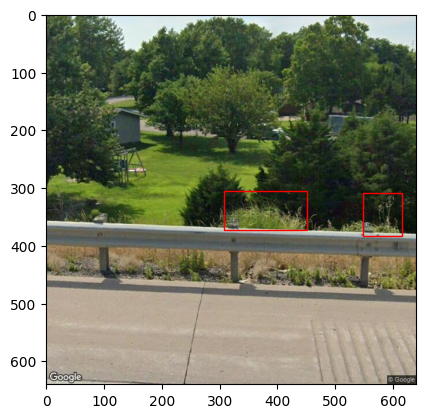

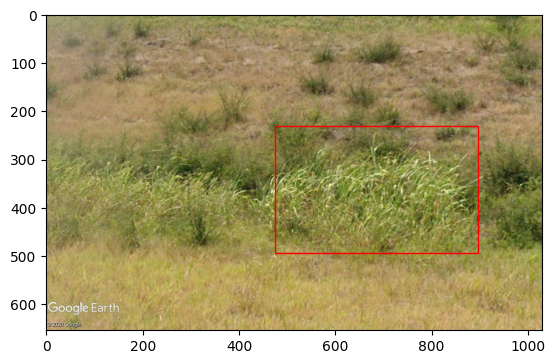

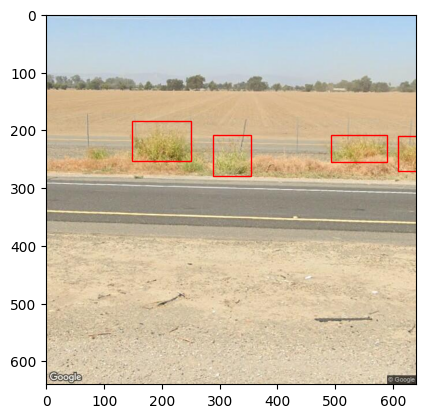

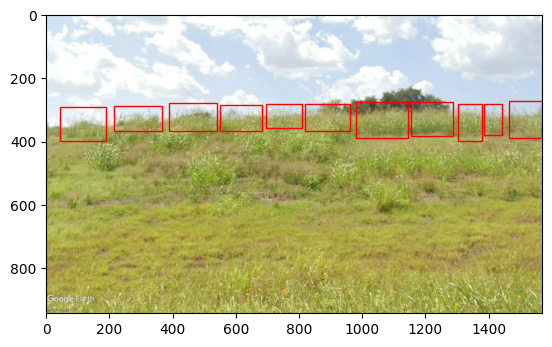

In [4]:
'''
L_Lat_30.6287_Long_-97.1166.jpg 321
29.6107,-97.8772.jpg 498

29.8479,-97.7257_A.jpg  523
L_18831.jpg     167

'''

# CHANGE CSV AND IMAGE FOLDER PATHS
csv_path = "labels.csv" 
image_folder = "LabelImage_KS_TX_Yolo" 

df = pd.read_csv(csv_path)


display_image_with_boxes(2, df, image_folder)
display_image_with_boxes(498, df, image_folder)
display_image_with_boxes(166, df, image_folder)
display_image_with_boxes(522, df, image_folder)

